## Author: A. N. M. Sajedul Alam

## Goal: Data Extraction from PDF files of Resume

### Implemented on 6 different resumes randomly collected from web

#### Mounting my google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Installing poppler utils for manipulating PDF files and converting them to other formats.

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.14 [154 kB]
Fetched 154 kB in 1s (123 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.14_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.14) ...
Setting up poppler-utils (0.62.0-2ubuntu2.14) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


#### Installing pdf2image and easyocr for converting pdf to image and for optical character recognition

In [ ]:
!pip install pdf2image
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 4.3 MB/s 
     |████████████████████████████████| 47.6 MB 2.2 MB/s 
     |████████████████████████████████| 604 kB 60.6 MB/s 
     |████████████████████████████████| 145 kB 56.2 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


#### Installing spacy for doing advanced natural language processing tasks and pillow's imageDraw module for getting simple 2D graphics for image objects.

In [ ]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

#### For working with English language specifically on resumes

In [ ]:
reader = easyocr.Reader(['fr'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

## Working on Resume Sample 1

#### Converting PDF to Images

In [ ]:
images = convert_from_path('/content/drive/MyDrive/Colab Notebooks/document_physique.pdf')

In [ ]:
nb_pages =np.size(images)
print(nb_pages)

# ou nb_pages=len(images)


3


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: FutureWarning: The input object of type 'PpmImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PpmImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


#### Displaying image

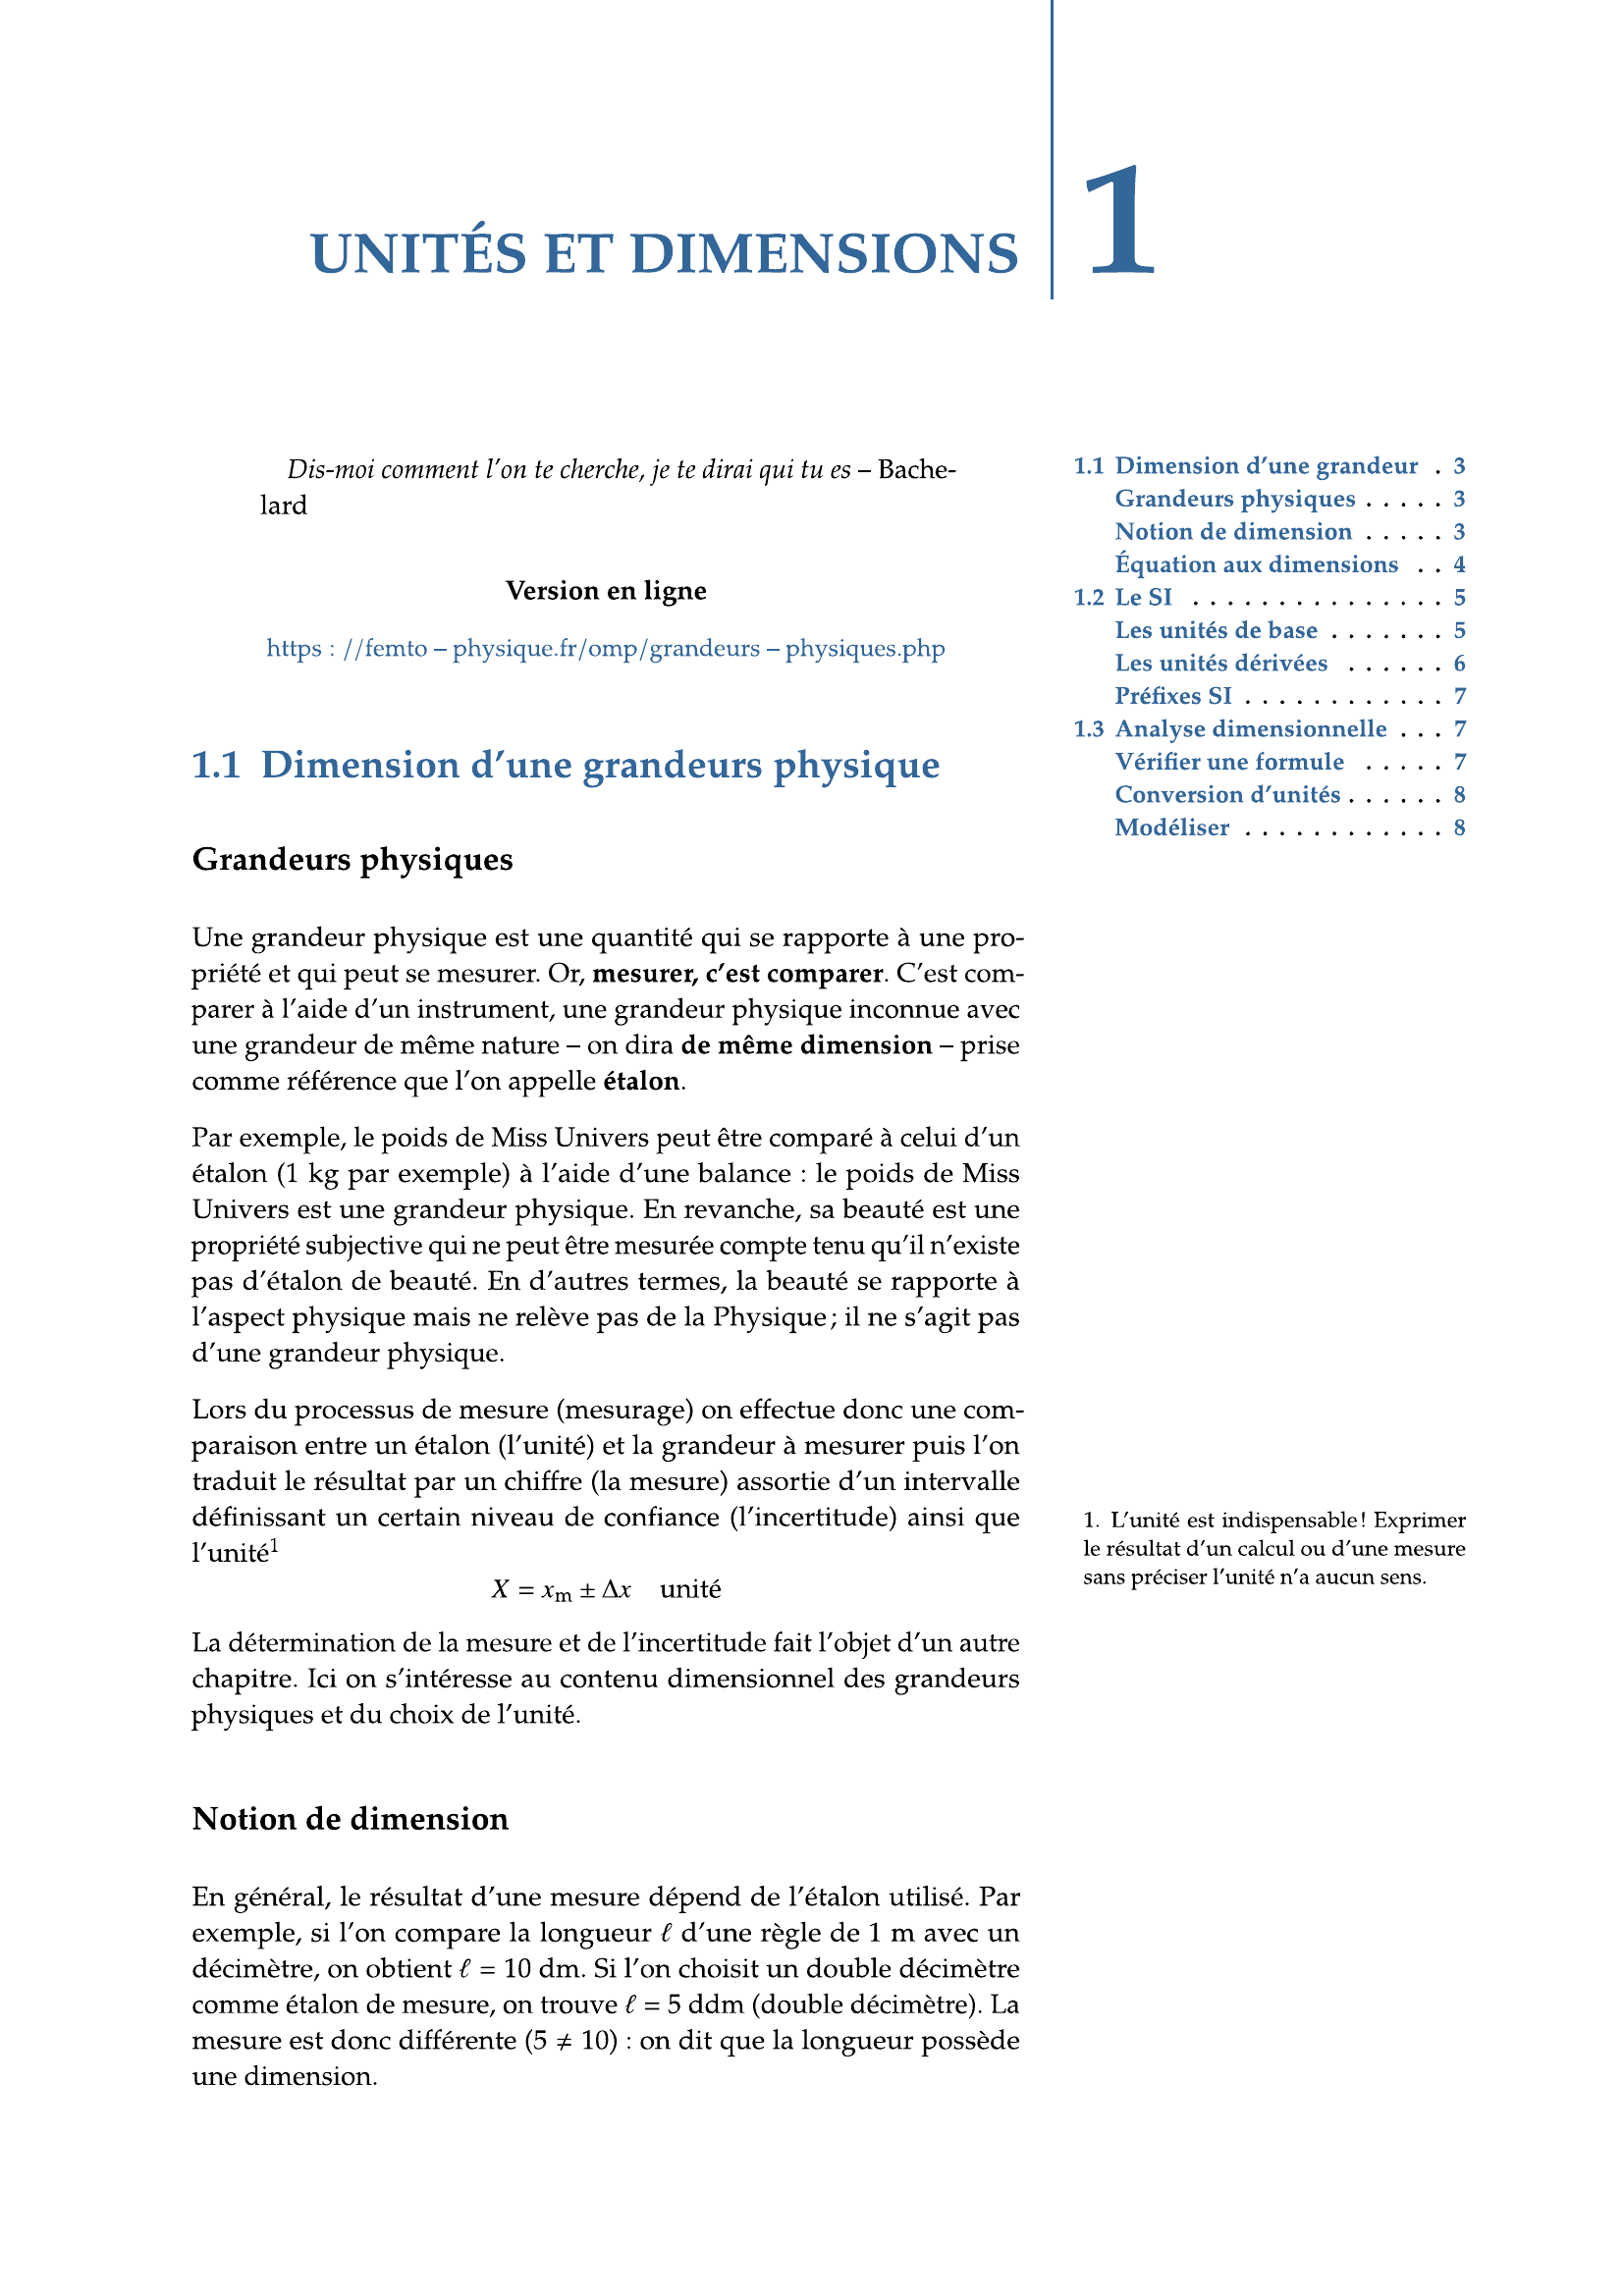

In [ ]:
from IPython.display import display, Image
display(images[0])
#display(images[1])

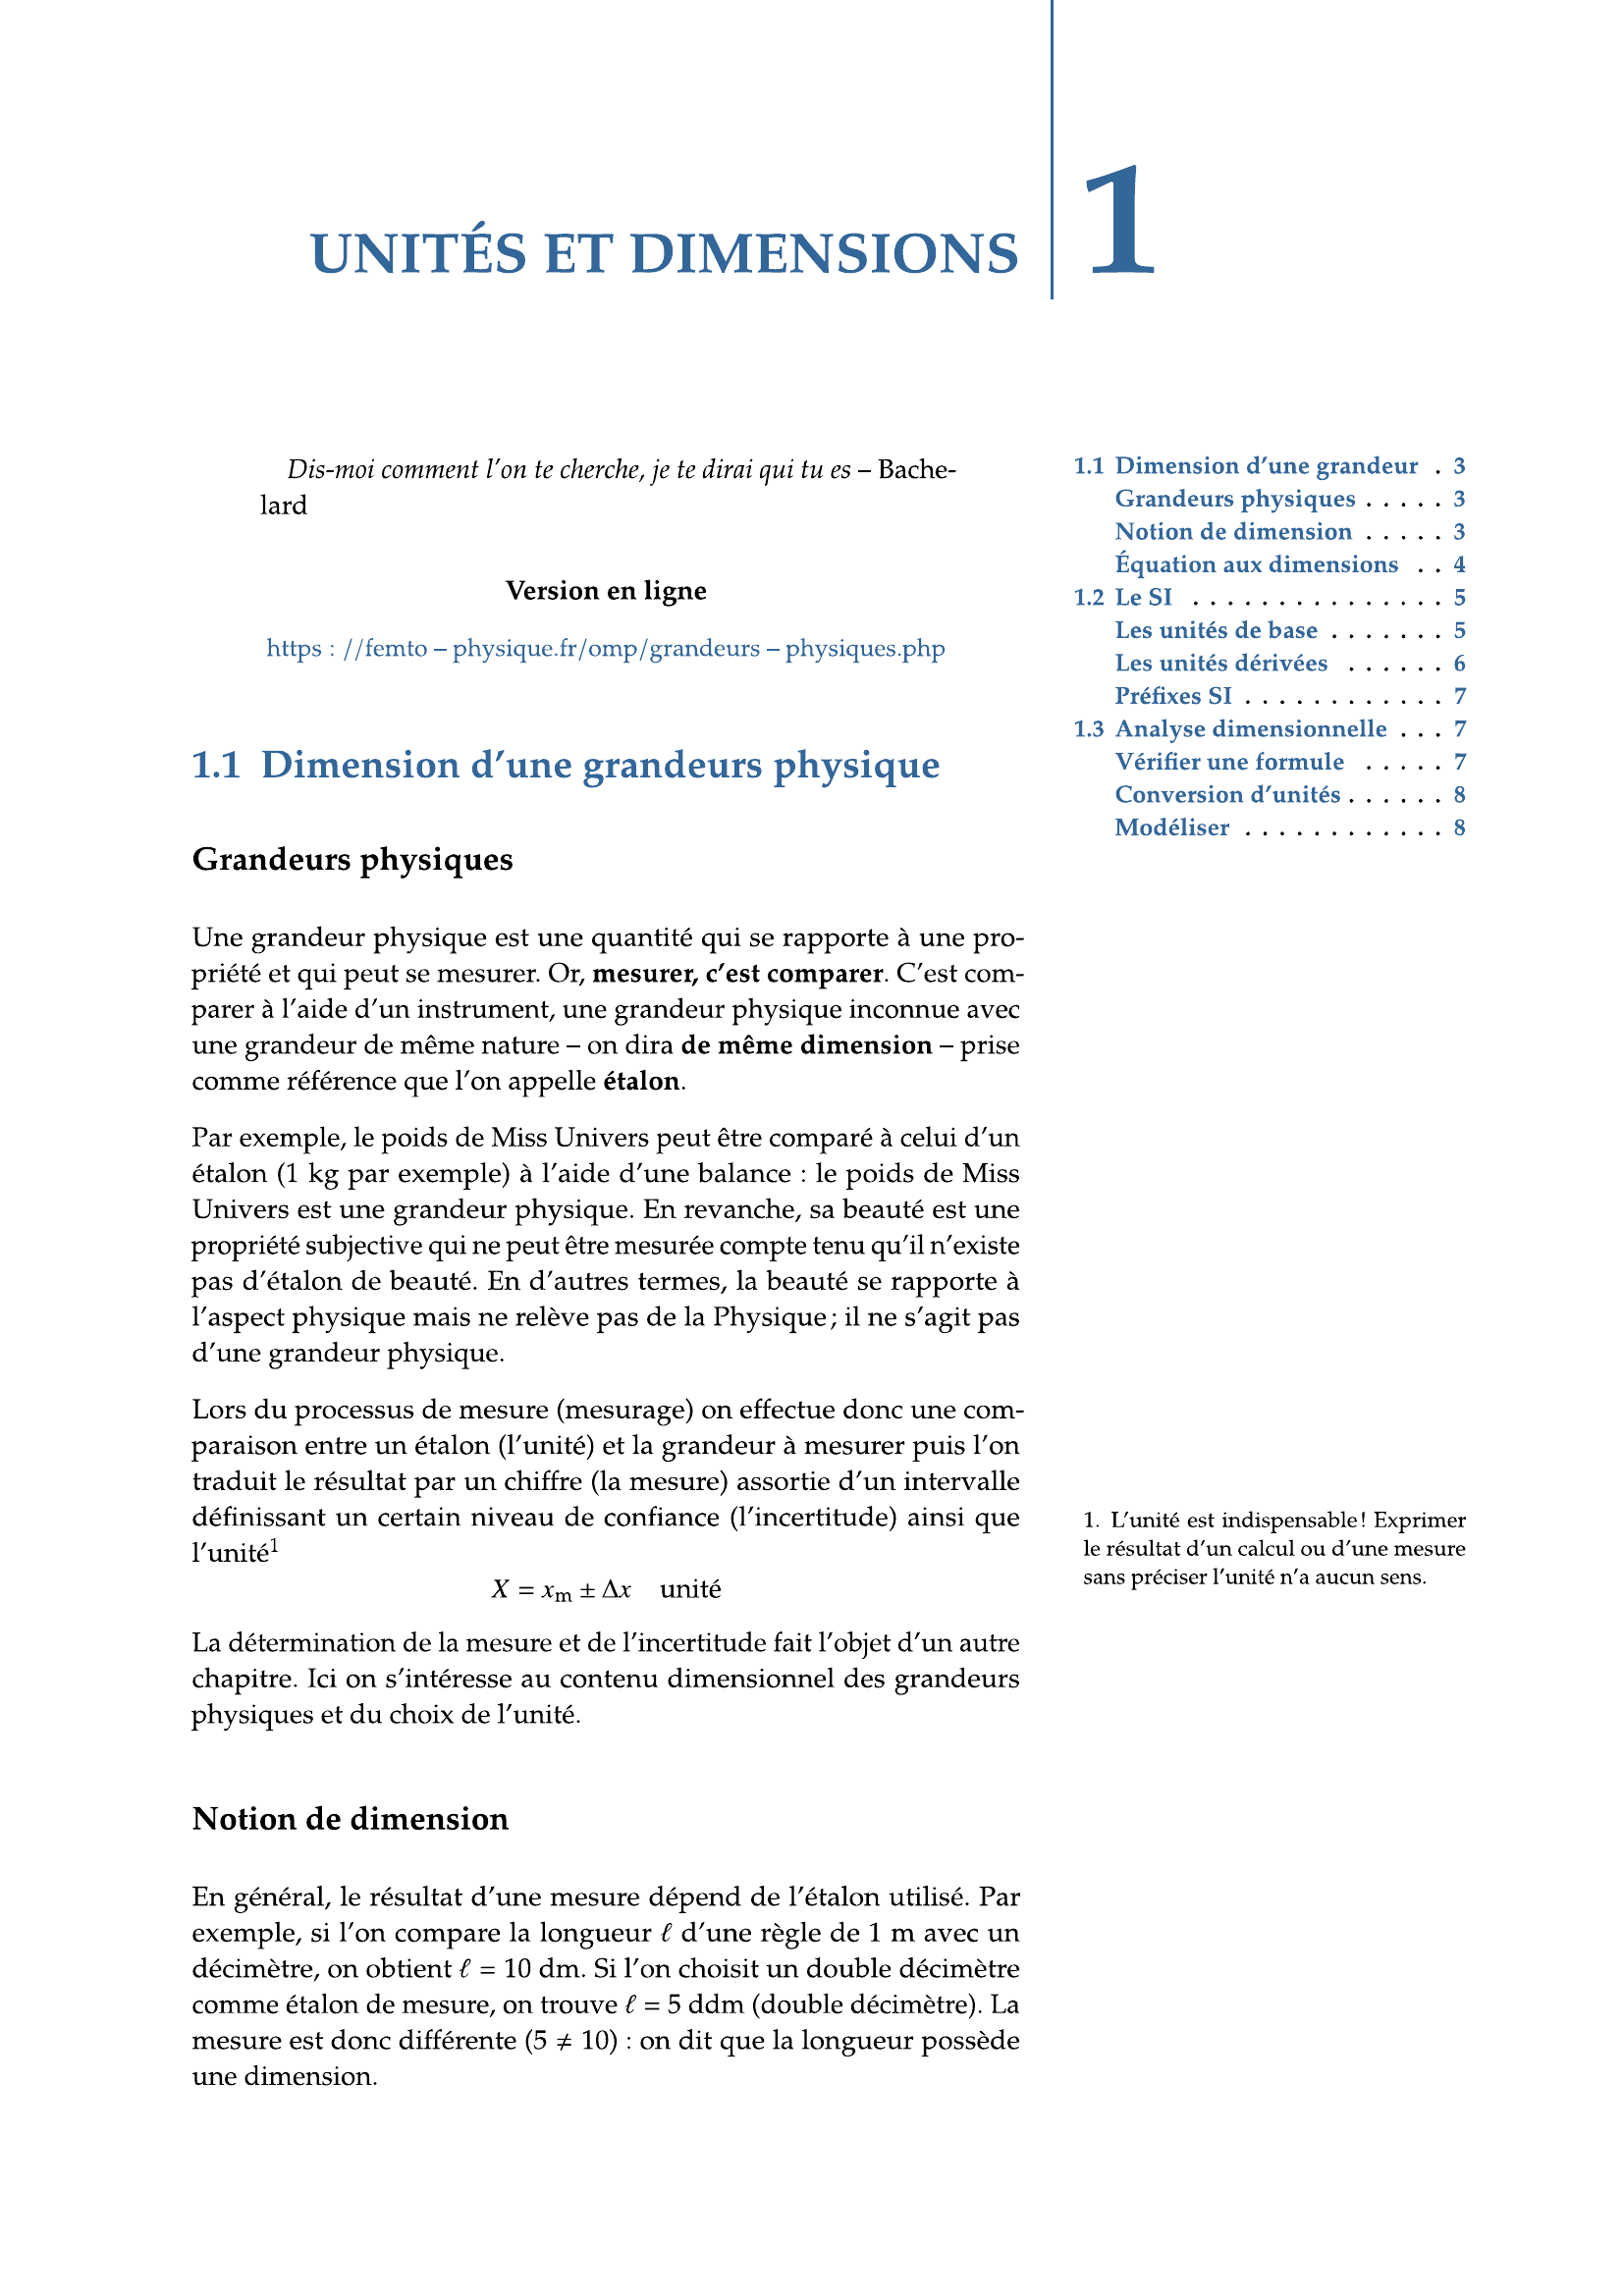

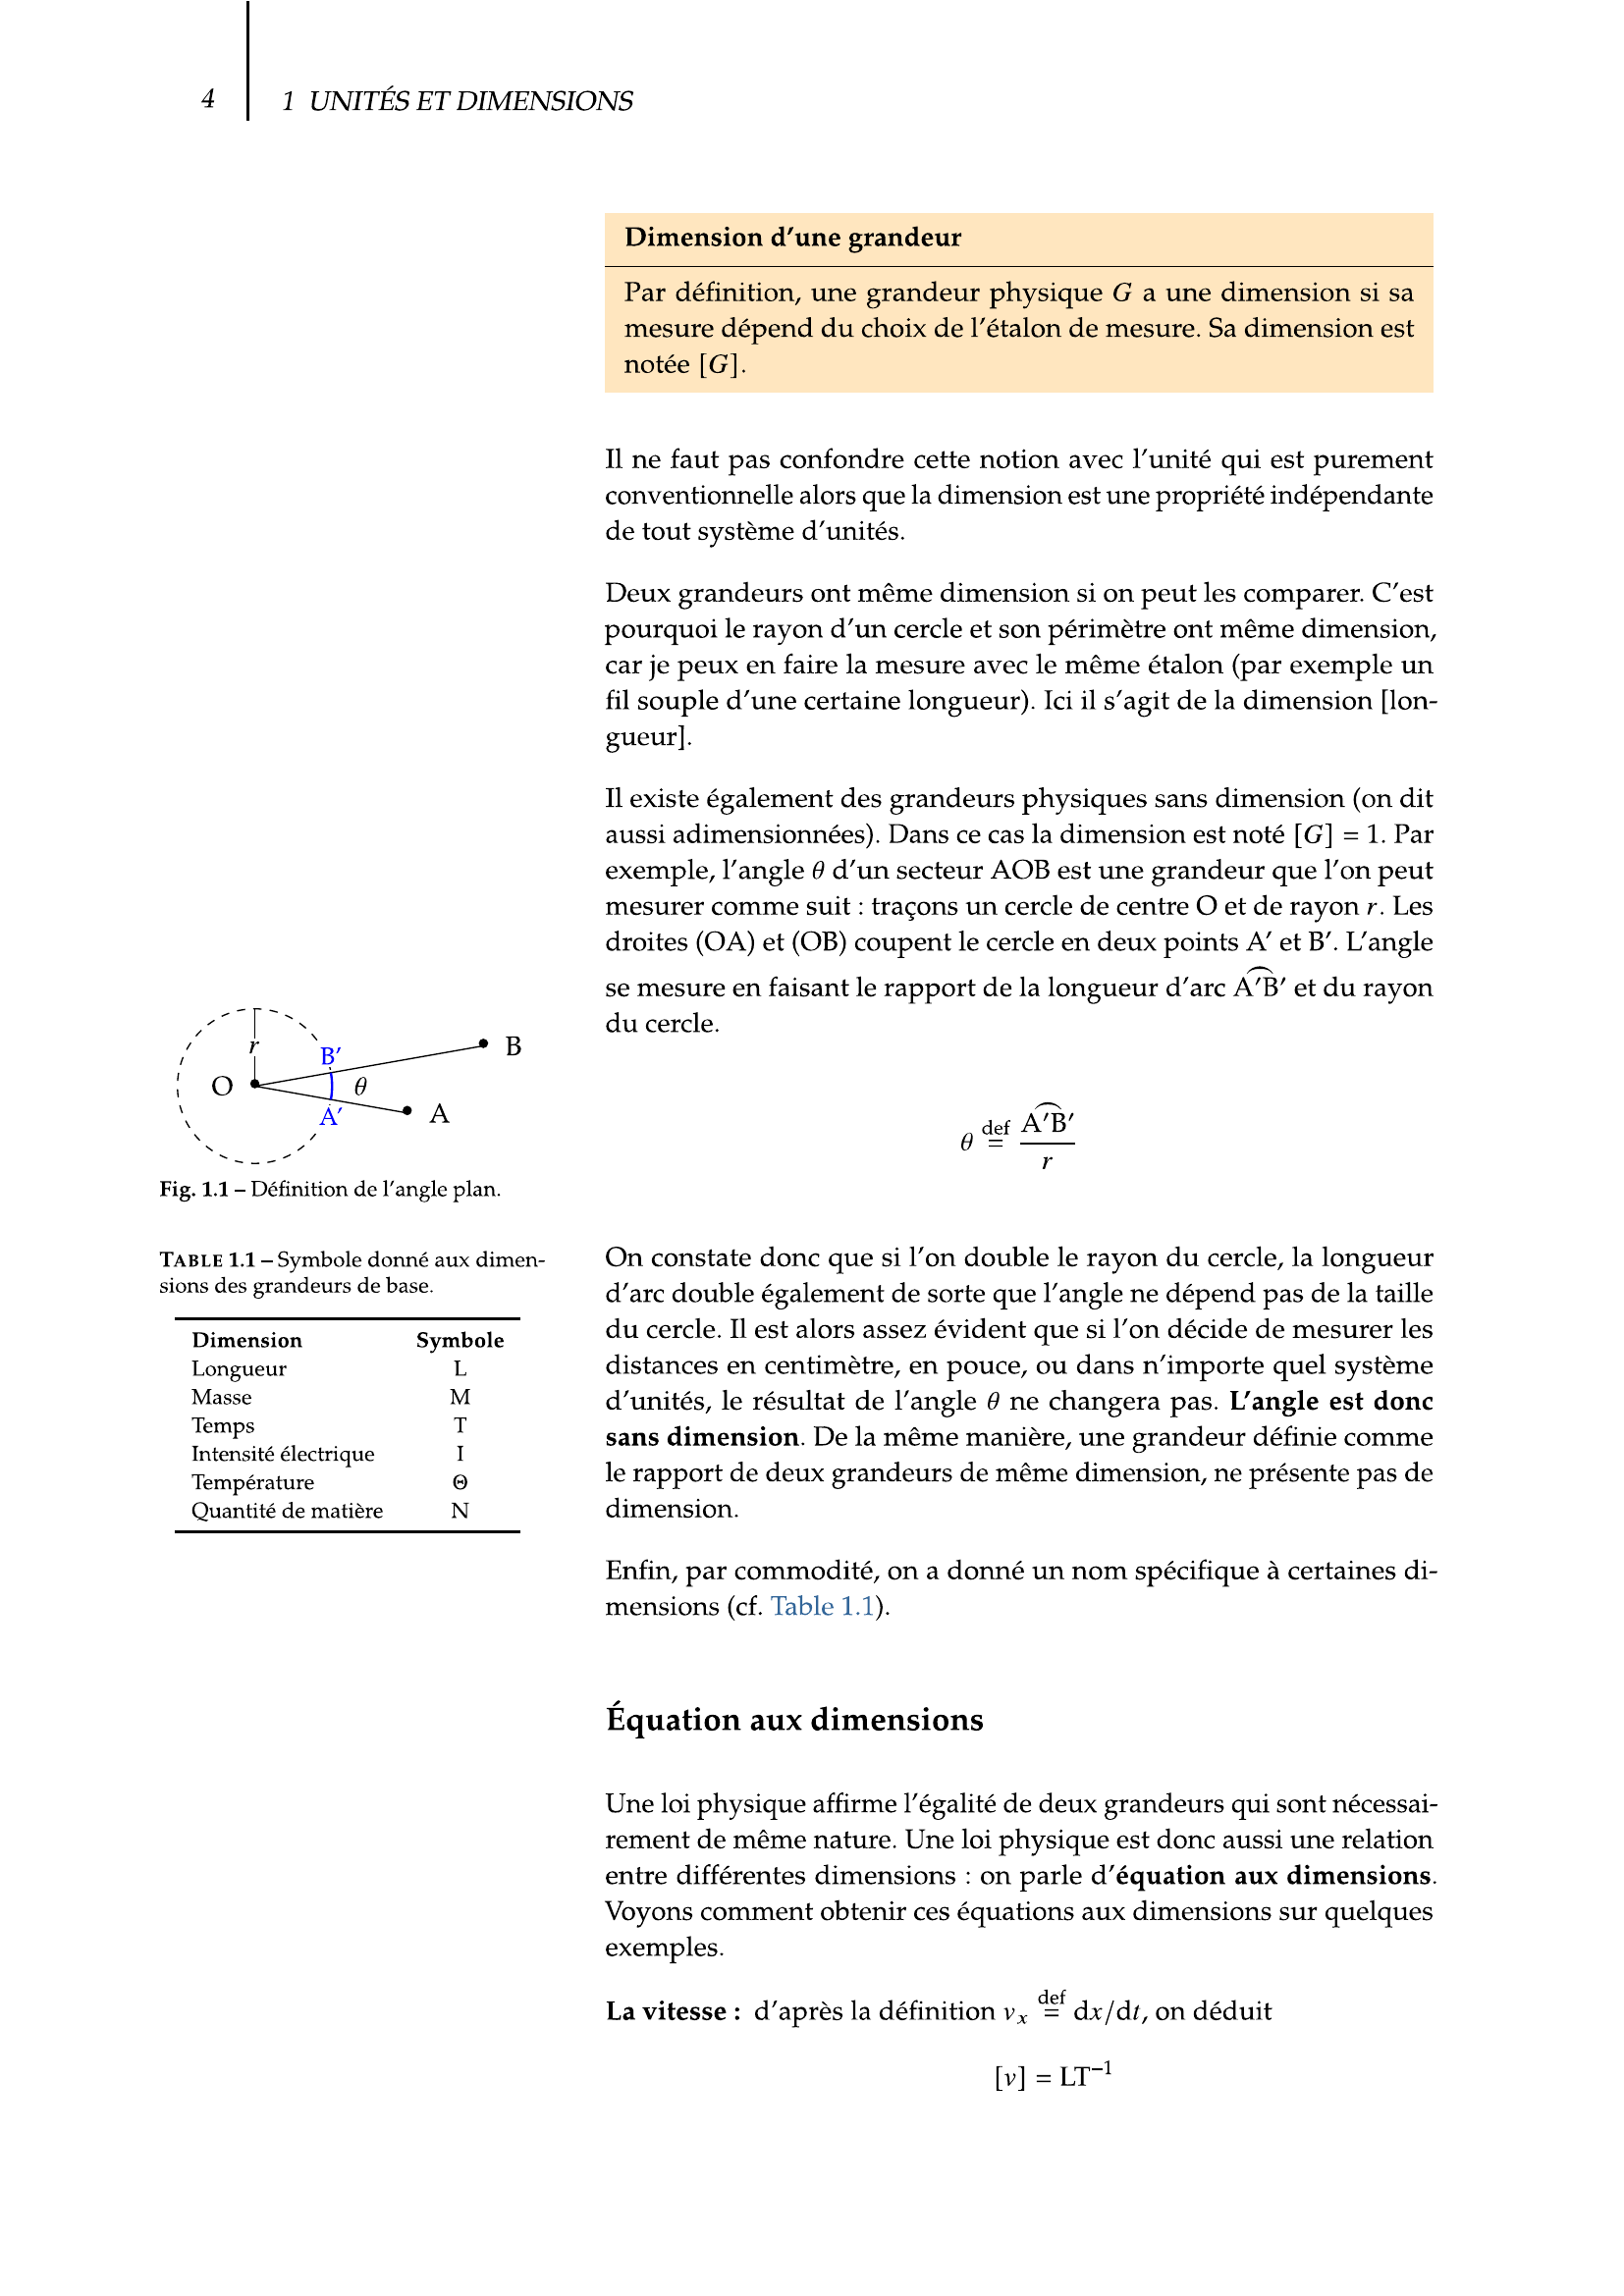

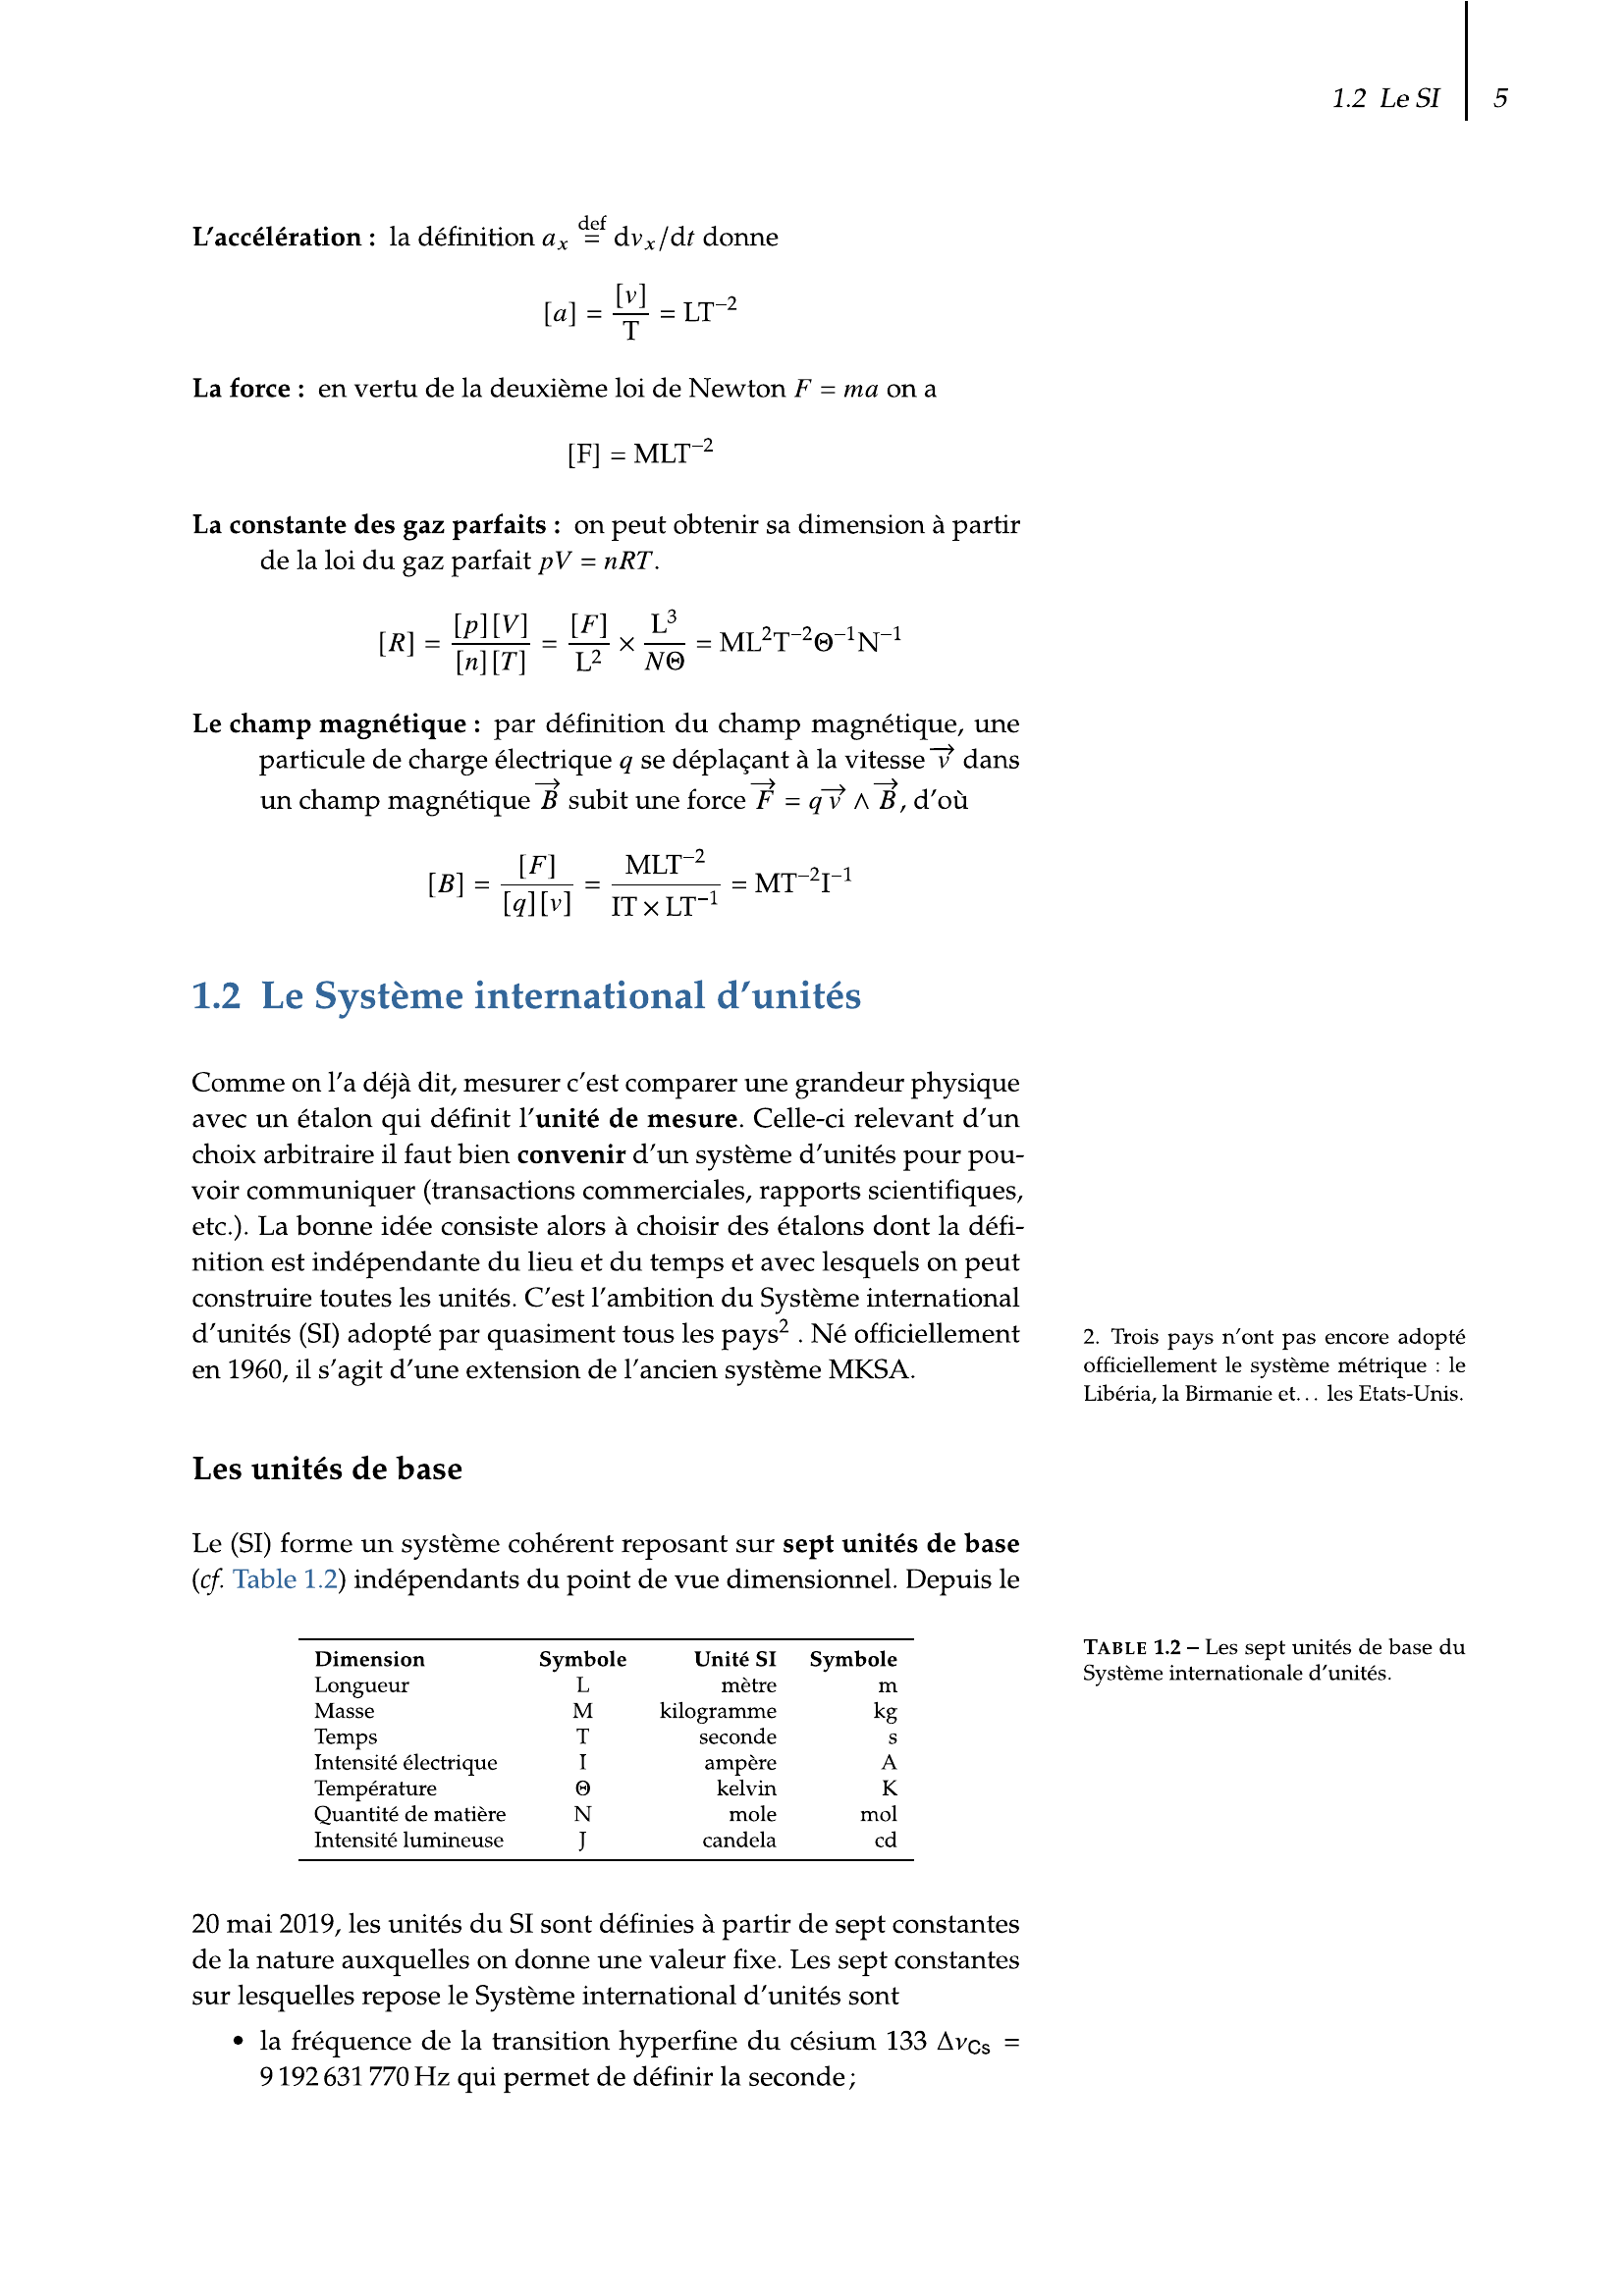

In [ ]:
for i in range (0,nb_pages):
  display(images[i])

Initialisation de la variable bounds. 
On pourrait directement faire une boucle pour l'ensemble du document. Cependant, il y'a des erreurs de compilation en effectuant ceci. Donc on lit dans un premier temps la premiere valeur

In [ ]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[307, 215], [1045, 215], [1045, 291], [307, 291]],
  'UNITÉS ET DIMENSIONS',
  0.8396771758524109),
 ([[1100, 170], [1180, 170], [1180, 286], [1100, 286]],
  '1',
  0.9998393123333358),
 ([[289, 461], [979, 461], [979, 499], [289, 499]],
  "Dis-moi comment l'on te cherche, je te dirai qui tu es - Bache-",
  0.6495177711533159),
 ([[1089, 456], [1449, 456], [1449, 493], [1089, 493]],
  '1.1 Dimension dune grandeur',
  0.9049582117224664),
 ([[1481, 465], [1493, 465], [1493, 485], [1481, 485]],
  '3',
  0.9999933242909265),
 ([[260, 500], [318, 500], [318, 530], [260, 530]],
  'lard',
  0.9977813363075256),
 ([[1130, 491], [1386, 491], [1386, 529], [1130, 529]],
  'Grandeurs physiques',
  0.9999612736584831),
 ([[1134, 526], [1380, 526], [1380, 556], [1134, 556]],
  'Notion de dimension',
  0.9998986208515463),
 ([[1131, 557], [1429, 557], [1429, 595], [1131, 595]],
  'Équation aux dimensions',
  0.7639842087100198),
 ([[511, 583], [727, 583], [727, 627], [511, 627]],
  'Version en li

In [ ]:
for i in range (1,nb_pages):
  bounds= bounds + reader.readtext(np.array(images[i]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
  

In [ ]:
bounds

[([[307, 215], [1045, 215], [1045, 291], [307, 291]],
  'UNITÉS ET DIMENSIONS',
  0.8396771758524109),
 ([[1100, 170], [1180, 170], [1180, 286], [1100, 286]],
  '1',
  0.9998393123333358),
 ([[289, 461], [979, 461], [979, 499], [289, 499]],
  "Dis-moi comment l'on te cherche, je te dirai qui tu es - Bache-",
  0.6495177711533159),
 ([[1089, 456], [1449, 456], [1449, 493], [1089, 493]],
  '1.1 Dimension dune grandeur',
  0.9049582117224664),
 ([[1481, 465], [1493, 465], [1493, 485], [1481, 485]],
  '3',
  0.9999933242909265),
 ([[260, 500], [318, 500], [318, 530], [260, 530]],
  'lard',
  0.9977813363075256),
 ([[1130, 491], [1386, 491], [1386, 529], [1130, 529]],
  'Grandeurs physiques',
  0.9999612736584831),
 ([[1134, 526], [1380, 526], [1380, 556], [1134, 556]],
  'Notion de dimension',
  0.9998986208515463),
 ([[1131, 557], [1429, 557], [1429, 595], [1131, 595]],
  'Équation aux dimensions',
  0.7639842087100198),
 ([[511, 583], [727, 583], [727, 627], [511, 627]],
  'Version en li

#### Drawing boxes over information

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image



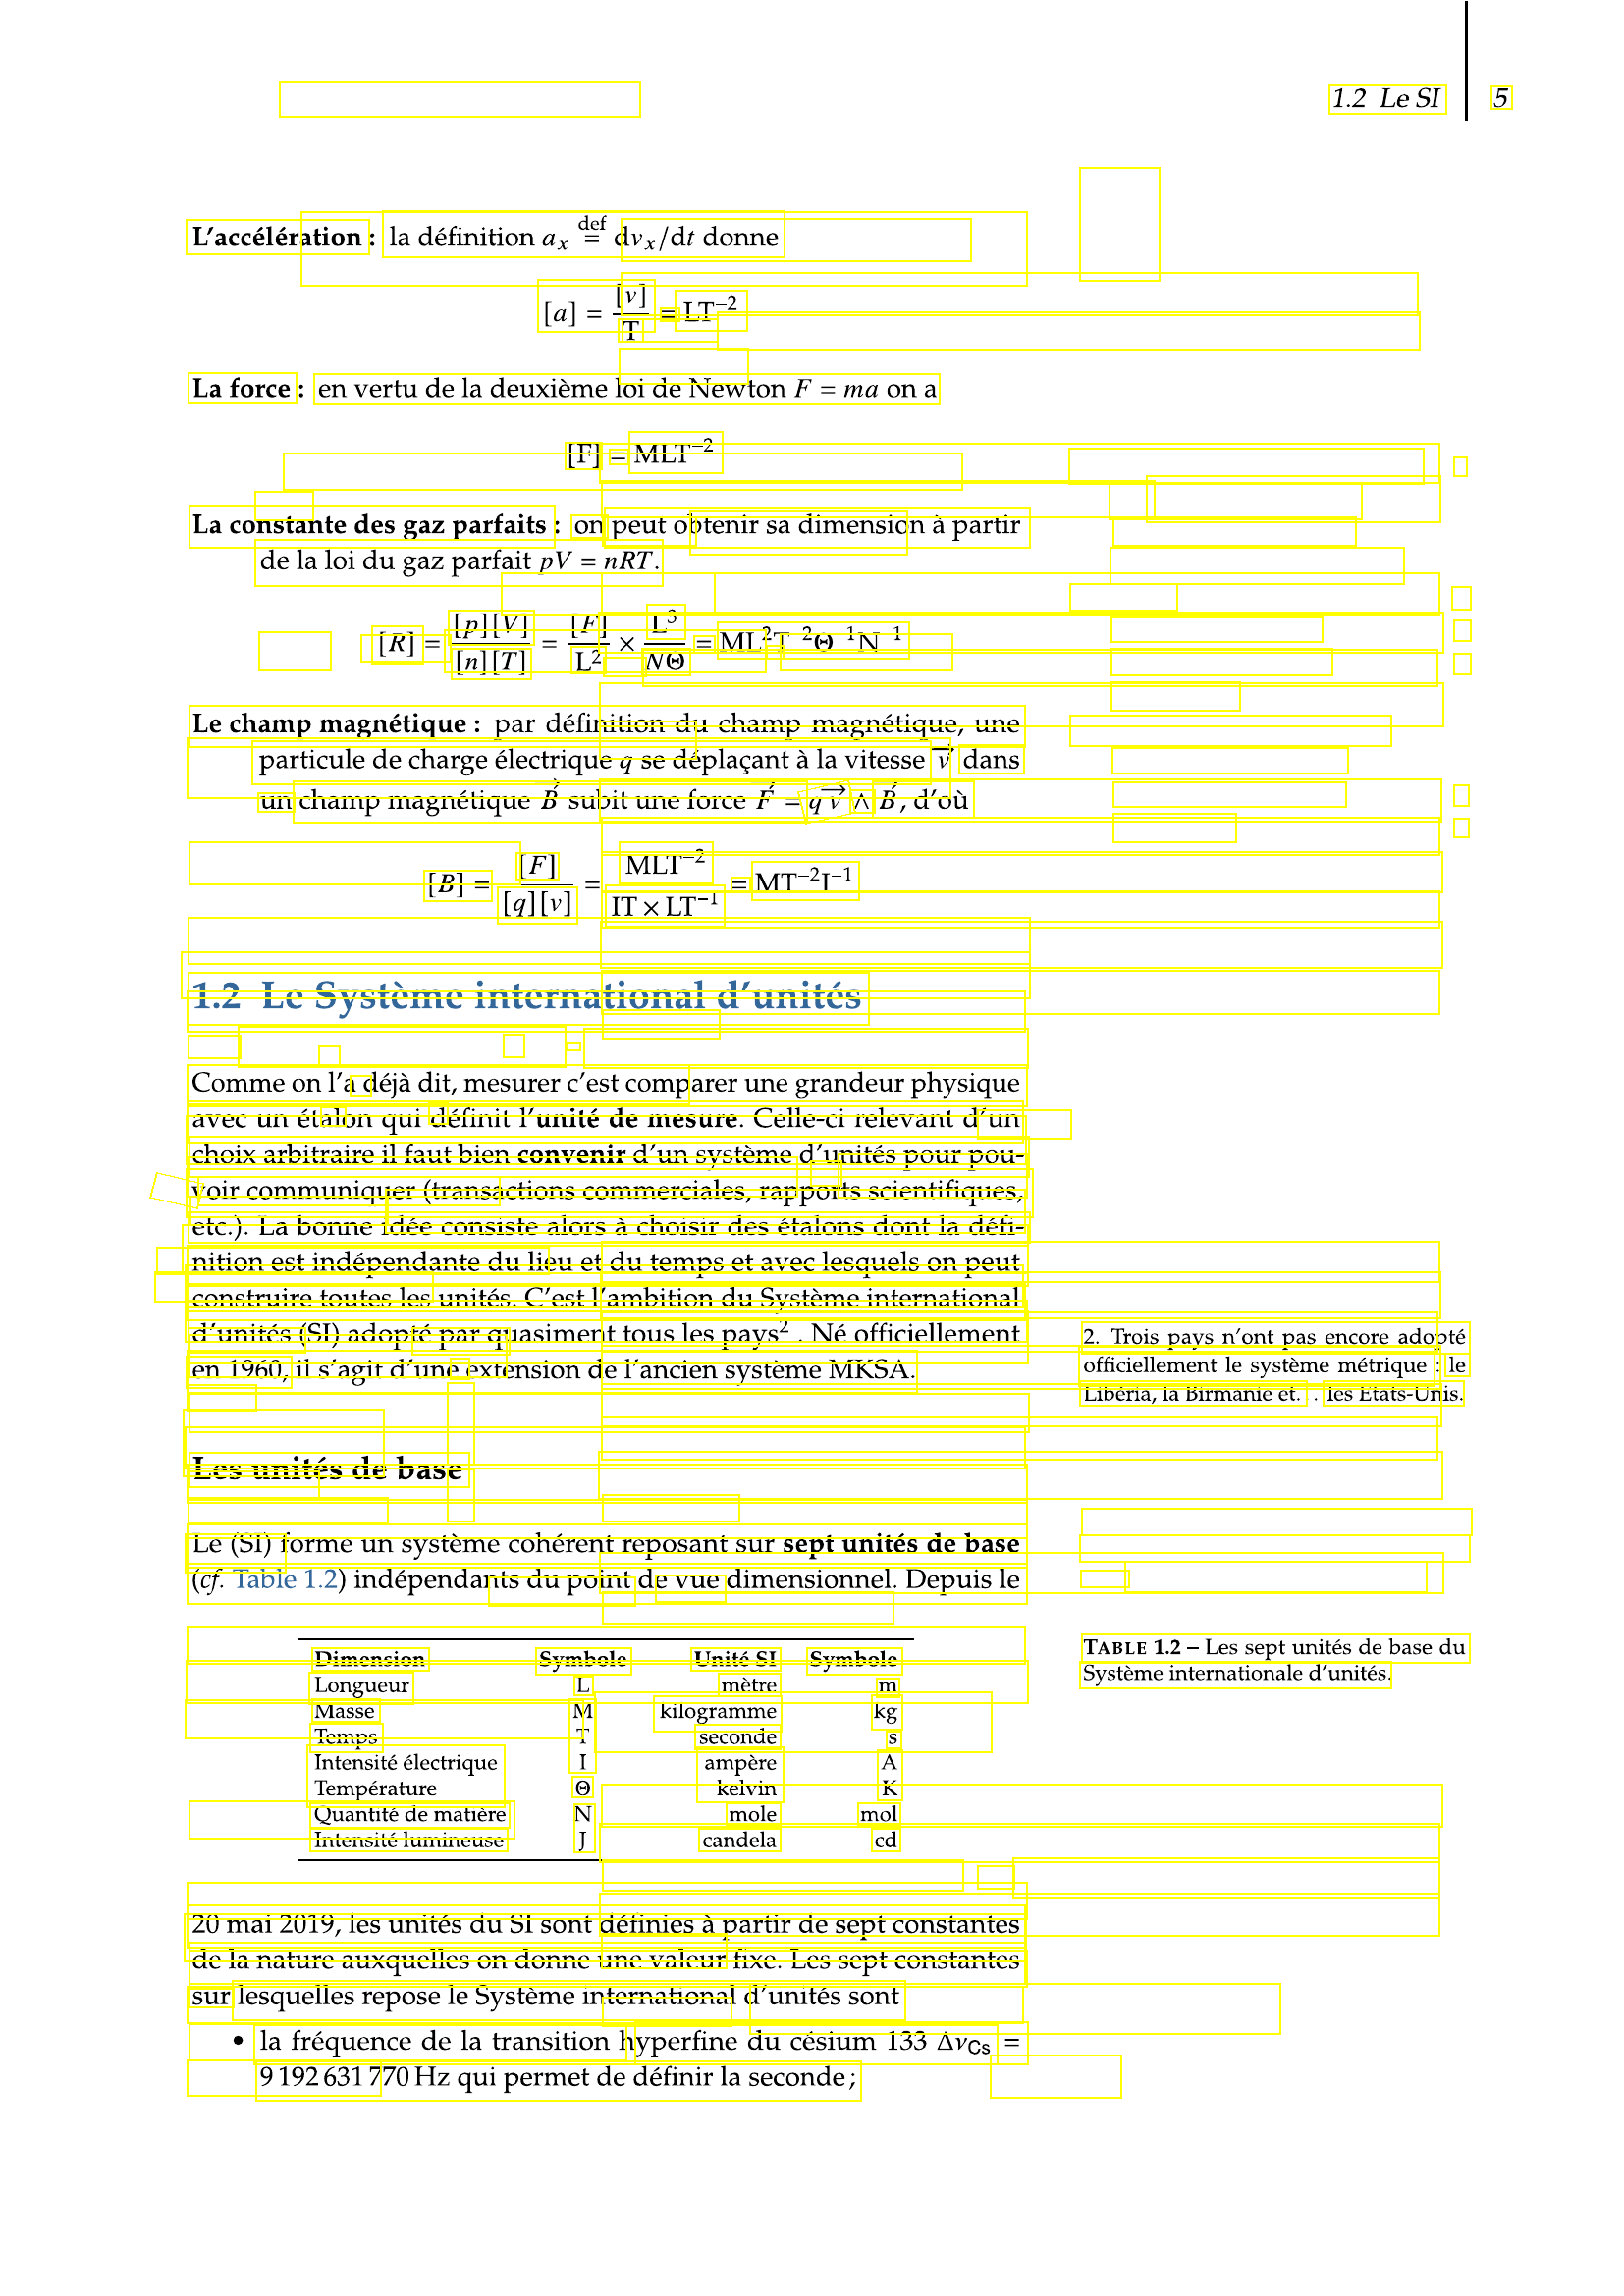

In [ ]:
draw_boxes(images[2], bounds)

In [ ]:
bounds[1][1]

#### Displaying all texts

In [ ]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

UNITÉS ET DIMENSIONS
1
Dis-moi comment l'on te cherche, je te dirai qui tu es - Bache-
1.1 Dimension dune grandeur
3
lard
Grandeurs physiques
Notion de dimension
Équation aux dimensions
Version en ligne
1.2 Le SI
5
Les unités de base
5
https
femto =
physique fr /omp /grandeurs
~
physiques php
Les unités dérivées
6
Préfixes SI
1.3 Analyse dimensionnelle
11 Dimension dune grandeurs physique
Vérifier une formule
Conversion dunités
8
Modéliser
8
Grandeurs physiques
Une grandeur physique est une quantité qui se rapporte à une pro-
priété et qui peut se mesurer: Or, mesurer; cest comparer. C'est com-
parer à laide dun instrument; une grandeur physique inconnue avec
une
grandeur de même nature

on dira de même dimension - prise
comme référence que Ion appelle étalon.
Par exemple, le poids de Miss Univers peut être comparé à celui dun
étalon (1 kg par exemple) à Iaide dune balance
le
poids de Miss
Univers est une
grandeur physique: En revanche, sa beauté est une
propriété subjective qui ne peu

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(text)

#### Displaying info

In [ ]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)